# Probabilidade de vitória no Grande Prêmio de Mônaco de Fórmula 1 via utilização de Regressão Logística

<b>OBJETIVO: Calcular as probabilidades de vitória no GP de Mônaco com base na posição de largada no grid.

<b>Estrutura do Estudo:
- Tópico 1: Premissas adotadas
- Tópico 2: Bibliotecas e Inputs necessários
- Tópico 3: Análise exploratória dos dados
- Tópico 4: Cálculo das probabilidades de vitória no GP de Mônaco

# Tópico 1: Premissas adotadas

- Linguagem de programação utilizada: <b>Python.</b>
- Os dados utilizados são de uma base proprietária que vem sendo criada a partir do site: <b>https://www.statsf1.com/pt/default.aspx</b>
- Os dados utilizados compreendem as corridas realizadas do ano de <b>2000 a 2021.</b>

# Tópico 2: Bibliotecas + Inputs

In [1]:
#Biblioteca para análise e manipulação de dados
import pandas as pd
#Biblioteca para criar gráficos
import matplotlib.pyplot as plt
#Biblioteca para realizar cálculos matemáticos
import numpy as np
#Bibliotecas para trabalhar com análises e modelos estatísticos
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, auc

In [2]:
Pasta_Base = r"C:\Users\momil\OneDrive\Gestão - Marcelo Milani\Projetos Hobbies\2. Análises e Estatísticas Fórmula 1\202205_R. Logística para predição de vitória GP Mônaco\Base de Dados.xlsx"
#Importar base com os resultados do Grande Prêmio de Mônaco
df_ResultadosGP = pd.read_excel(Pasta_Base, sheet_name="Tab_Resultados_GP")
#Importar base com as quebras e acidentes do GP de Mônaco
df_Quebras_Acidentes = pd.read_excel(Pasta_Base, sheet_name="Quebras_Acidentes")
#Importar base com os dados para a modelagem
df_Dados_Modelagem = pd.read_excel(Pasta_Base, sheet_name="Dados_Modelagem")

In [3]:
#Exibir 5 primeiras linhas da tabela com os resultados do GP
df_ResultadosGP.head()

,Código,Circuito,Ano,Piloto,Qualificacao,Finalizou?,Classificacao
0,1,Monaco,2000,Michael SCHUMACHER,1,Não,0
1,2,Monaco,2000,Jarno TRULLI,2,Não,0
2,3,Monaco,2000,David COULTHARD,3,Sim,1
3,4,Monaco,2000,Heinz-Harald FRENTZEN,4,Sim,10
4,5,Monaco,2000,Mika HAKKINEN,5,Sim,6


In [4]:
#Exibir 5 primeiras linhas da tabela com os % de quebras e acidentes do GP
df_Quebras_Acidentes.head()

,Ano,Percentual_Quebras_Acidentes_%
0,2000,54.5
1,2001,54.5
2,2002,45.5
3,2003,35.0
4,2004,50.0


In [5]:
#Exibir 5 primeiras linhas da tabela com os dados para modelagem
df_Dados_Modelagem.head()

,Ano,Posicao_Largada,Venceu_Corrida
0,2005,1,1
1,2005,2,0
2,2005,3,0
3,2005,4,0
4,2005,5,0


# Tópico 3: Análise exploratória dos dados

<b><u>POSIÇÃO DE LARGADA DOS VENCEDORES DO GP

In [6]:
#Manter somente os pilotos que venceram a corrida ao longo dos anos abordados
df_ResultadosGP.drop(df_ResultadosGP[(df_ResultadosGP["Classificacao"] != 1)].index, inplace=True)
#Exibir as 5 primeiras linhas
df_ResultadosGP.head()

,Código,Circuito,Ano,Piloto,Qualificacao,Finalizou?,Classificacao
2,3,Monaco,2000,David COULTHARD,3,Sim,1
23,25,Monaco,2001,Michael SCHUMACHER,2,Sim,1
45,47,Monaco,2002,David COULTHARD,2,Sim,1
68,70,Monaco,2003,Juan-Pablo MONTOYA,3,Sim,1
86,88,Monaco,2004,Jarno TRULLI,1,Sim,1


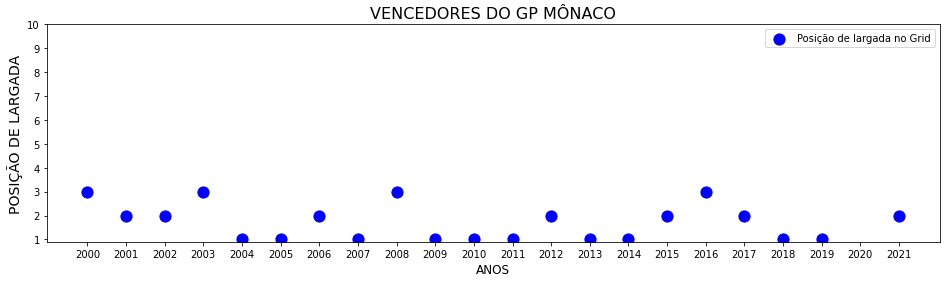

In [7]:
#Criar gráfico
plt.figure(figsize=(16, 4))
plt.scatter(df_ResultadosGP["Ano"], df_ResultadosGP["Qualificacao"].values, label="Posição de largada no Grid", color = 'b', marker = '.', s = 500)
#Inserir Legenda
plt.legend()
#Inserir Título
plt.title("VENCEDORES DO GP MÔNACO", color="black", fontsize=16)
#Títulos dos Eixos
plt.xlabel("ANOS", fontsize=12)
plt.ylabel("POSIÇÃO DE LARGADA", fontsize=14)
#Definir escala do eixo X
Escala_EixoX = np.arange(2000, 2022, 1) 
plt.xticks(Escala_EixoX)
#Definir escala do eixo Y
Escala_EixoY = np.arange(1, 11, 1) 
plt.yticks(Escala_EixoY)
#Exibir gráfico
plt.show()

Observa-se que nas últimas 21 corridas o vencedor iniciou largando entre as 3 primeiras posições do grid. Para quem não está familiarizado, de forma resumida, o circuito de Mônaco é extremamente estreito e por isso, as ultrapassagens são limitadas ao longo da corrida.

<i>*Em 2020 não houve o GP de Mônaco devido a Pandemia (COVID-19)</i>

<b><u>PERCENTUAL DE CARROS QUE NÃO COMPLETAM A CORRIDA

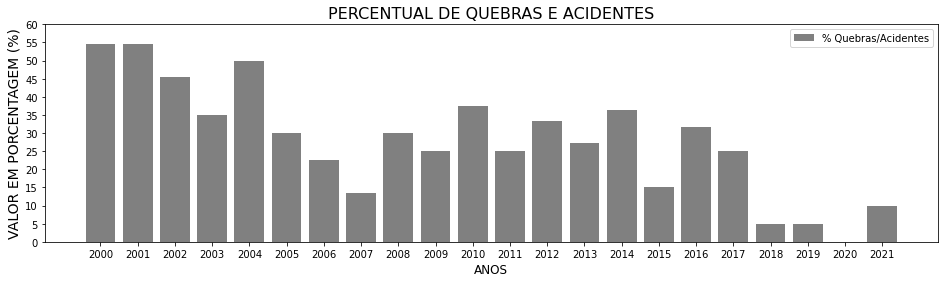

In [8]:
#Criar gráfico
plt.figure(figsize=(16, 4))
plt.bar(df_Quebras_Acidentes["Ano"], df_Quebras_Acidentes["Percentual_Quebras_Acidentes_%"].values, label="% Quebras/Acidentes", color="grey")
#Inserir Legenda
plt.legend()
#Inserir Título
plt.title("PERCENTUAL DE QUEBRAS E ACIDENTES", color="black", fontsize=16)
#Títulos dos Eixos
plt.xlabel("ANOS", fontsize=12)
plt.ylabel("VALOR EM PORCENTAGEM (%)", fontsize=14)
#Definir escala do eixo X
Escala_EixoX = np.arange(2000, 2022, 1) 
plt.xticks(Escala_EixoX)
#Definir escala do eixo Y
Escala_EixoY = np.arange(0, 65, 5) 
plt.yticks(Escala_EixoY)
#Exibir gráfico
plt.show()

In [9]:
#Calcular estatísticas descritivas das quebras e acidentes do GP
Estatisticas_Descritivas = df_Quebras_Acidentes["Percentual_Quebras_Acidentes_%"].describe()
print(f"Estatísticas descritivas das quebras/acidentes do GP de Mônaco:\n\n{Estatisticas_Descritivas}")

Estatísticas descritivas das quebras/acidentes do GP de Mônaco:

count    21.000000
mean     29.147619
std      14.562576
min       5.000000
25%      22.700000
50%      30.000000
75%      36.400000
max      54.500000
Name: Percentual_Quebras_Acidentes_%, dtype: float64


De forma geral nas últimas 21 corridas, observa-se que houve um alto índice de carros que não terminaram o Grande Prêmio de Mônaco. Como mencionado anteriormente, o circuito por ser bem estreito (circuito de rua) além de dificultar as ultrapassagens dos carros, acaba favorecendo para que Quebras e Acidentes* aconteçam.

Dentro do período analisado (2000 a 2021), os anos de 2000 e 2001 foram os que tiveram a maior quantidade de carros não finalizando o GP (54,5% para ambos os anos). De 2005 em diante nota-se que os números ficaram mais próximos da média (~29%).

Com o passar dos anos, o circuito vai sofrendo algumas modificações visto que os carros evoluem continuamente (a Fórmula 1 é um berço de inovação, tecnologia e melhoria contínua) e esse processo tende a contribuir para uma diminuição do percentual de carros que não finalizam o GP. Também, já como proposta de evolução desse estudo, pode ser útil aplicar alguma técnica estatística para avaliar se há uma diferença significativa no Percentual (%) de quebras e acidentes entre os anos.

<i>*Quebras e Acidentes -> Qualquer tipo de acidente envolvendo um ou mais carros e/ou problemas elétricos, hidráulicos, de motor, entre outros.</i>

<i>*Em 2020 não houve o GP de Mônaco devido a Pandemia (COVID-19)</i>

# Tópico 4: Cálculo das probabilidades de vitória no GP de Mônaco

<b><u>PREMISSAS E INFORMAÇÕES GERAIS

- Para fins de modelagem os dados utilizados consideram o ano de 2005 em diante (A partir de 2005 o % de carros que não completam a prova fica mais próximo da média. Futuramente outras abordagens estatísticas poderiam ser utilizadas para tal determinação).
- Os dados dos carros que não completaram a prova por acidente e/ou quebra serão mantidos. Essas situações fazem parte da corrida.

- Variável Explicativa (X): Posições de largada dos carros no grid.
- Variável Resposta (Y): <b>1 -></b> Venceu a corrida. <b>0 -></b> Não venceu a corrida.

<b><u>REGRESSÃO LOGÍSTICA

In [10]:
modelo = smf.glm(formula='Venceu_Corrida ~ Posicao_Largada', data=df_Dados_Modelagem,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:         Venceu_Corrida   No. Observations:                  342
Model:                            GLM   Df Residuals:                      340
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27.672
Date:                Mon, 30 May 2022   Deviance:                       55.344
Time:                        16:35:05   Pearson chi2:                     56.3
No. Iterations:                    11   Pseudo R-squ. (CS):             0.1943
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.7860      0.736     

A variável explicativa posição de largada ("Posicao_Largada") é estatisticamente significativa para o modelo (p-valor abaixo de 5% adotando 95% de confiança).

Ao se analisar o coeficiente da variável "Posicao_Largada", nota-se que quanto menor a posição de largada (mais próximo das primeiras posições) melhores são as chances de vencer a corrida.

<b><u>VALIDAÇÃO DO MODELO

Para validação do modelo utilizou-se das métricas AUC e ROC.

De forma resumida, a curva ROC (Receiver Operating Characteristic) mostra o quão bom o modelo criado pode distinguir entre duas coisas (Classificação de coisas). Uma curva ROC compara os seguintes parâmetros: Taxa de verdadeiro positivo vs. Taxa de falso positivo.

Por sua vez, a AUC (Area under the curve) possibilita resumir a curva ROC através de um valor único. Sua escala varia de 0 a 1, onde quanto mais próximo de 1, melhor o poder de classificação/previsão do modelo. 

In [11]:
#Calcular a AUC da curva ROC
y = df_Dados_Modelagem["Venceu_Corrida"]
X = df_Dados_Modelagem["Posicao_Largada"]
yhat = modelo.predict(sm.add_constant(X))

print("Valor AUC = %0.4f" % roc_auc_score(y,yhat))

Valor AUC = 0.9724


<b><u>PREDIÇÕES

O atual grid da Fórmula 1 (2022) é formado por 20 carros/pilotos. Sendo assim, abaixo se tem a Probabilidade de vencer a corrida de Mônaco com base nas respectivas posições de largada:

In [12]:
#Criando DataFrame com as 20 posições de largada
PosicaoLargada = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df_GridCorrida = pd.DataFrame(PosicaoLargada, columns=["Posicao_Largada"])

In [13]:
#Calculando as probabilidades
ProbabilidadeVencer = modelo.predict(df_GridCorrida)
#Adicionando as probabilidades de vitória no DataFrame
df_GridCorrida["Probabilidade_Vencer_Corrida_[em %]"] = ProbabilidadeVencer
#Ajustes
df_GridCorrida["Probabilidade_Vencer_Corrida_[em %]"] = df_GridCorrida["Probabilidade_Vencer_Corrida_[em %]"].round(4)*100
#Exibir resultados
df_GridCorrida

,Posicao_Largada,Probabilidade_Vencer_Corrida_[em %]
0,1,60.20
1,2,27.71
2,3,8.86
3,4,2.40
4,5,0.62
5,6,0.16
6,7,0.04
7,8,0.01
8,9,0.00
9,10,0.00


Nota-se que as probabilidades de vitória no GP de Mônaco estão concentradas nos carros/pilotos que largam dentro das 3 primeiras posições do grid. Muito disso está relacionado as condições e características do circuito. Como citado algumas vezes anteriormente, o GP de Mônaco é um circuito de rua e bem estreito, onde as ultrapassagens são raras.

In [14]:
Probabilidade_3Primeiros = df_GridCorrida["Probabilidade_Vencer_Corrida_[em %]"].values[0:3].sum()
print(f"Os carros que largam nas 3 primeiras posições concentram {Probabilidade_3Primeiros} % das probabilidades de vitória.")

Os carros que largam nas 3 primeiras posições concentram 96.77 % das probabilidades de vitória.


Tais estatísticas reforçam a importância da etapa de Qualificação* que antecede a corrida. Nesse circuito, largar entre as primeiras posições é crucial para vencer a corrida!

<i>*Qualificação -> Etapa que define a posição de largada de cada carro/piloto. Larga em 1º quem fizer uma volta mais rápida e assim sucessivamente, sendo o último quem fizer a volta mais lenta.</i>

No último domingo (29/05/2022) ocorreu o Grande Prêmio de Mônaco dessa temporada. O grid de largada pode ser conferido no seguinte endereço: https://www.statsf1.com/pt/2022/monaco/qualification.aspx.

3 primeiras posições do grid de largada - GP Mônaco 2022:
- 1º Piloto: Charles LECLERC - Equipe: Ferrari
- 2º Piloto: Carlos SAINZ - Equipe: Ferrari
- 3º Piloto: Sergio PEREZ - Equipe: Red Bull Racing

E conforme previsto pelo modelo de regressão logística desse estudo, mais um ano em que o vencedor largou entre os 3 primeiros do grid. O GP de Mônaco 2022 foi vencido pelo Piloto Sergio Perez da equipe Red Bull Racing (Largou na 3ª Posição do grid).

Assim terminou o GP Mônaco 2022: https://www.statsf1.com/pt/2022/monaco/classement.aspx.